In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Sinthetic data: XOR problem

(-0.6311376533399962,
 1.5936467468465463,
 -0.6626024002125377,
 1.6730370189651922)

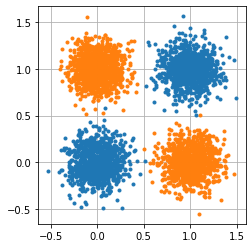

In [2]:
#data creation
def XORdata(s=0.15,N=1000,sFlag=True):
    x00=rd.randn(2,N)*s
    x10=rd.randn(2,N)*s
    x10[0,:]=x10[0,:]+1
    x01=rd.randn(2,N)*s
    x01[1,:]=x01[1,:]+1
    x11=rd.randn(2,N)*s+1

    x0=np.hstack((x00,x11))
    x1=np.hstack((x10,x01))
    
    X=np.hstack((x0,x1))
    y=np.hstack((np.zeros(2*N),np.ones(2*N)))*2-1
    
    if sFlag:
        #shuffle data
        idx=rd.permutation(X.shape[1])
        X=X[:,idx]
        y=y[idx]
    
    return X,y

X1,y1=XORdata()
X2,y2=XORdata(sFlag=False)

plt.plot(X1[0,y1==-1],X1[1,y1==-1],'.')
plt.plot(X1[0,y1==1],X1[1,y1==1],'.')
plt.grid(True)
plt.axis('scaled')

In [3]:
X2.shape

(2, 4000)

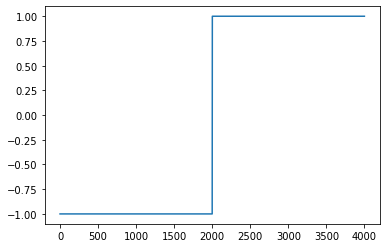

In [4]:
plt.plot(y2)

### A 3-layer MLP network with Nh units in the hidden layer

In [5]:
Nh=10
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(Nh,activation='tanh',input_shape=(2,)))
mlp.add(keras.layers.Dense(1,activation='sigmoid'))

mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [7]:
wList=mlp.get_weights()
print(wList)

[array([[-0.18413705,  0.10833293, -0.11466438,  0.7012283 ,  0.19479734,
        -0.2308703 , -0.11980343,  0.37108225,  0.02770513, -0.09742516],
       [ 0.17512506,  0.6136728 , -0.24152741, -0.24063626, -0.04310846,
         0.62583286,  0.3574924 ,  0.46440548,  0.3352291 , -0.32208166]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.40386578],
       [-0.70635766],
       [-0.18666977],
       [ 0.48546845],
       [ 0.3194961 ],
       [ 0.19248158],
       [ 0.72185737],
       [-0.066921  ],
       [-0.4150978 ],
       [-0.63294095]], dtype=float32), array([0.], dtype=float32)]


In [8]:
train=mlp.fit(X1.T,(y1>0)*1,validation_data=(X2.T,(y2>0)*1),epochs=200,batch_size=1000)

Epoch 1/200
4/4 [==============================] - 1s 53ms/step - loss: 0.7053 - accuracy: 0.3935 - val_loss: 0.7056 - val_accuracy: 0.4075
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7044 - accuracy: 0.4250 - val_loss: 0.7048 - val_accuracy: 0.4387
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.7036 - accuracy: 0.4520 - val_loss: 0.7040 - val_accuracy: 0.4618
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7029 - accuracy: 0.4675 - val_loss: 0.7034 - val_accuracy: 0.4780
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.7023 - accuracy: 0.4798 - val_loss: 0.7027 - val_accuracy: 0.4873
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7017 - accuracy: 0.4888 - val_loss: 0.7021 - val_accuracy: 0.4933
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7011 - accuracy: 0.4950 - val_loss: 0.7016 - val_accuracy: 0.4955
Epoch 8/200
4/4 [====

4/4 [==============================] - 0s 13ms/step - loss: 0.6652 - accuracy: 0.7122 - val_loss: 0.6651 - val_accuracy: 0.7138
Epoch 60/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6638 - accuracy: 0.7185 - val_loss: 0.6636 - val_accuracy: 0.7190
Epoch 61/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6624 - accuracy: 0.7193 - val_loss: 0.6621 - val_accuracy: 0.7180
Epoch 62/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6609 - accuracy: 0.7222 - val_loss: 0.6606 - val_accuracy: 0.7265
Epoch 63/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6593 - accuracy: 0.7280 - val_loss: 0.6590 - val_accuracy: 0.7287
Epoch 64/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.7300 - val_loss: 0.6574 - val_accuracy: 0.7290
Epoch 65/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6561 - accuracy: 0.7312 - val_loss: 0.6557 - val_accuracy: 0.7297
Epoch 66/200
4/4 [========

4/4 [==============================] - 0s 13ms/step - loss: 0.5080 - accuracy: 0.9923 - val_loss: 0.5076 - val_accuracy: 0.9912
Epoch 118/200
4/4 [==============================] - 0s 12ms/step - loss: 0.5044 - accuracy: 0.9918 - val_loss: 0.5040 - val_accuracy: 0.9912
Epoch 119/200
4/4 [==============================] - 0s 12ms/step - loss: 0.5007 - accuracy: 0.9918 - val_loss: 0.5003 - val_accuracy: 0.9912
Epoch 120/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4971 - accuracy: 0.9918 - val_loss: 0.4967 - val_accuracy: 0.9918
Epoch 121/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4935 - accuracy: 0.9920 - val_loss: 0.4931 - val_accuracy: 0.9918
Epoch 122/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4898 - accuracy: 0.9923 - val_loss: 0.4894 - val_accuracy: 0.9920
Epoch 123/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4861 - accuracy: 0.9918 - val_loss: 0.4858 - val_accuracy: 0.9915
Epoch 124/200
4/4 [=

Epoch 175/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3064 - accuracy: 0.9955 - val_loss: 0.3072 - val_accuracy: 0.9948
Epoch 176/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3034 - accuracy: 0.9955 - val_loss: 0.3043 - val_accuracy: 0.9948
Epoch 177/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3005 - accuracy: 0.9952 - val_loss: 0.3013 - val_accuracy: 0.9948
Epoch 178/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2975 - accuracy: 0.9952 - val_loss: 0.2984 - val_accuracy: 0.9948
Epoch 179/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2946 - accuracy: 0.9952 - val_loss: 0.2955 - val_accuracy: 0.9948
Epoch 180/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2917 - accuracy: 0.9952 - val_loss: 0.2926 - val_accuracy: 0.9948
Epoch 181/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2889 - accuracy: 0.9952 - val_loss: 0.2898 - val_accuracy: 0.9948
Epoch 

In [9]:
h=train.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

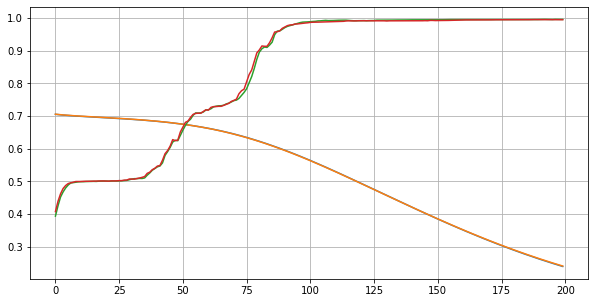

In [10]:
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)

In [11]:
ye=mlp.predict(X2.T).squeeze()

In [12]:
ye.shape

(4000,)

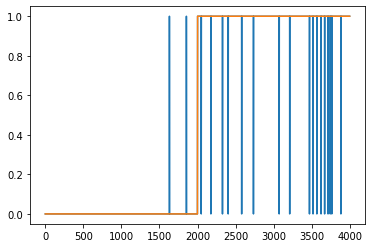

In [13]:
plt.plot((ye>0.5)*1)
plt.plot((y2>0)*1)


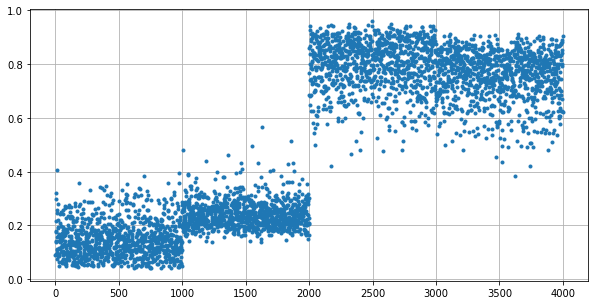

In [14]:
plt.figure(figsize=(10,5))
plt.plot(ye,'.')
plt.grid(True)

Nº de erros: 4000


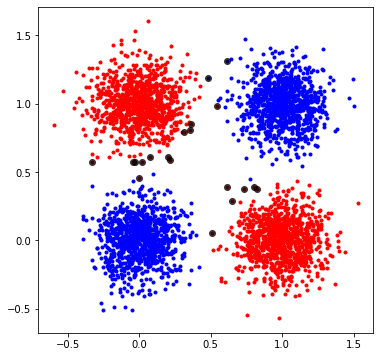

In [15]:
plt.figure(figsize=(6,6))
yb=(ye>=0.5)*2-1
plt.plot(X2[0,y2==-1],X2[1,y2==-1],'.b')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.r')
plt.plot(X2[0,y2!=yb],X2[1,y2!=yb],'ok',alpha=.7)
print('Nº de erros:',np.sum(y2!=ye))


In [16]:
print(confusion_matrix((y2>0)*1,(ye>0.5)*1))

[[1998    2]
 [  18 1982]]


### Visualize MLP transfer function

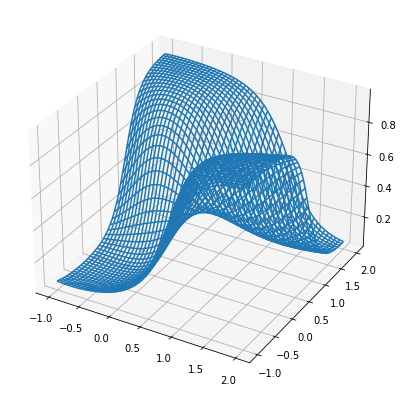

In [17]:
gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
Xg=np.vstack((gX.ravel(),gY.ravel()))

yh=mlp.predict(Xg.T).squeeze()
Yh=np.reshape(yh,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh)

### FMNIST dataset
### MLP networks

(-0.5, 619.5, 309.5, -0.5)

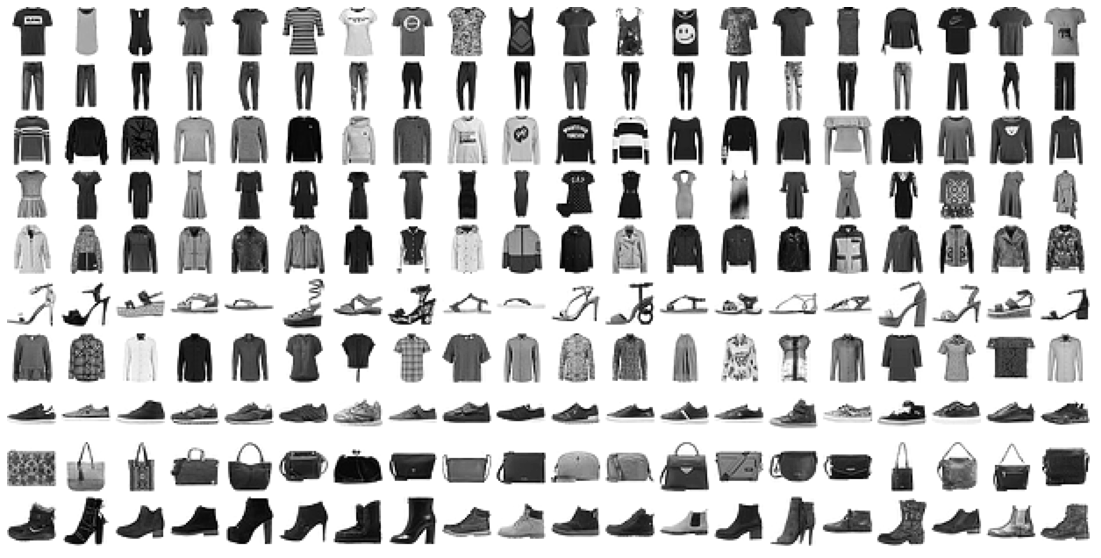

In [18]:
fmnist=keras.datasets.fashion_mnist
(X1,y1),(X2,y2)=fmnist.load_data()
X1=X1*1.
X2=X2*1.
idxList=[]
for i in range(10):
    idxTemp=np.argwhere(y1==i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx=idxList[i]
    for n in range(20):
        if n==0:
            Img=np.hstack((255-X1[idx[n]],np.ones((28,3))*255))
        else:
            Img=np.hstack((Img,255-X1[idx[n]],np.ones((28,3))*255))

    if i==0:
        ImgT=np.vstack((Img,np.ones((3,Img.shape[1]))*255))
    else:
        ImgT=np.vstack((ImgT,Img,np.ones((3,Img.shape[1]))*255))

plt.figure(figsize=(20,10))
plt.imshow(ImgT,cmap='gray')
plt.axis('off')

In [19]:
print(X1.shape,X2.shape)

(60000, 28, 28) (10000, 28, 28)


#### Convert classes to vectors

In [20]:
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)


In [21]:
print(Y1.shape,Y2.shape)

(60000, 10) (10000, 10)


### 1st Try: 
### Raw data 
### 5-Layer MLP network

In [22]:
nn=keras.Sequential()
#1º convert images to vectors (1st layer)
nn.add(keras.layers.Flatten(input_shape=[28,28]))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(10,activation='softmax'))


In [23]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
_________________________________________________________________


#### Compile

In [24]:
nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Train (use test set for validation)

In [25]:
train=nn.fit(X1,Y1,epochs=50,batch_size=1000,validation_data=(X2,Y2))

Epoch 1/50
60/60 [==============================] - 1s 12ms/step - loss: 8.7090 - accuracy: 0.5666 - val_loss: 2.2513 - val_accuracy: 0.6761
Epoch 2/50
60/60 [==============================] - 1s 9ms/step - loss: 1.6628 - accuracy: 0.7048 - val_loss: 1.3800 - val_accuracy: 0.7053
Epoch 3/50
60/60 [==============================] - 1s 9ms/step - loss: 1.1298 - accuracy: 0.7344 - val_loss: 1.0785 - val_accuracy: 0.7288
Epoch 4/50
60/60 [==============================] - 1s 9ms/step - loss: 0.9127 - accuracy: 0.7522 - val_loss: 0.9477 - val_accuracy: 0.7440
Epoch 5/50
60/60 [==============================] - 1s 9ms/step - loss: 0.7833 - accuracy: 0.7655 - val_loss: 0.8434 - val_accuracy: 0.7608
Epoch 6/50
60/60 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.7833 - val_loss: 0.7661 - val_accuracy: 0.7727
Epoch 7/50
60/60 [==============================] - 1s 8ms/step - loss: 0.6249 - accuracy: 0.7945 - val_loss: 0.7256 - val_accuracy: 0.7803
Epoch 8/50
60/60 [=

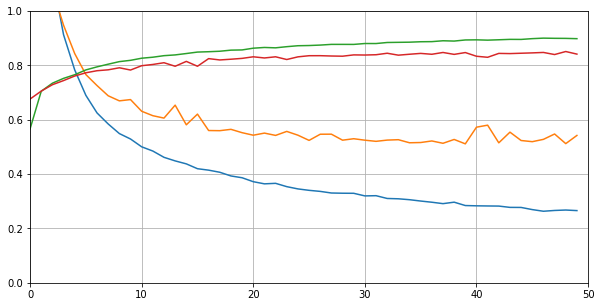

In [26]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.axis([0,50,0,1])
plt.grid(True)

In [27]:
Y2e=nn.predict(X2)
print(Y2e.shape)
y2e=np.argmax(Y2e,axis=1)

(10000, 10)


### Nº of errors and confusion matrix

Nº total de erros: 1586


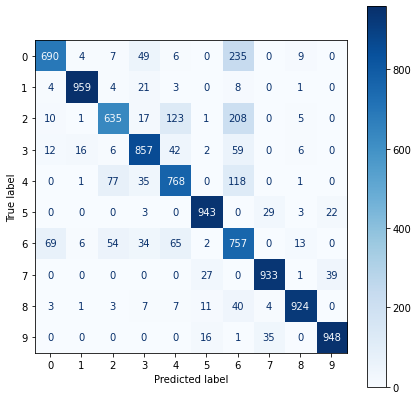

In [28]:
CM=confusion_matrix(y2,y2e)
print('Nº total de erros:',np.sum(y2!=y2e))
disp=ConfusionMatrixDisplay(CM,)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)

### 2nd Try:
### Using normalized data
### 5-layer MLP (same as before)


#### Data Normalization

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Strain=X1.shape[0]
Stest=X2.shape[0]

X1N = scaler.fit_transform(X1.reshape((Strain,784))).reshape((Strain,28,28))
X2N = scaler.transform(X2.reshape(Stest,784)).reshape((Stest,28,28))
print(X1N.shape,X2N.shape)

(60000, 28, 28) (10000, 28, 28)


In [30]:
nn=keras.Sequential()
#1º convert images to vectors (1st layer)
nn.add(keras.layers.Flatten(input_shape=[28,28]))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(10,activation='softmax'))

nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
_________________________________________________________________


In [32]:
train=nn.fit(X1N,Y1,epochs=50,batch_size=1000,validation_data=(X2N,Y2))

Epoch 1/50
60/60 [==============================] - 2s 13ms/step - loss: 0.8188 - accuracy: 0.7227 - val_loss: 0.5006 - val_accuracy: 0.8148
Epoch 2/50
60/60 [==============================] - 1s 10ms/step - loss: 0.4230 - accuracy: 0.8455 - val_loss: 0.4285 - val_accuracy: 0.8429
Epoch 3/50
60/60 [==============================] - 1s 9ms/step - loss: 0.3676 - accuracy: 0.8669 - val_loss: 0.3983 - val_accuracy: 0.8562
Epoch 4/50
60/60 [==============================] - 1s 10ms/step - loss: 0.3407 - accuracy: 0.8755 - val_loss: 0.3943 - val_accuracy: 0.8566
Epoch 5/50
60/60 [==============================] - 1s 10ms/step - loss: 0.3211 - accuracy: 0.8824 - val_loss: 0.3703 - val_accuracy: 0.8661
Epoch 6/50
60/60 [==============================] - 1s 10ms/step - loss: 0.3039 - accuracy: 0.8884 - val_loss: 0.3645 - val_accuracy: 0.8671
Epoch 7/50
60/60 [==============================] - 1s 10ms/step - loss: 0.2895 - accuracy: 0.8938 - val_loss: 0.3639 - val_accuracy: 0.8687
Epoch 8/50
60/

(0.0, 50.0, 0.0, 1.0)

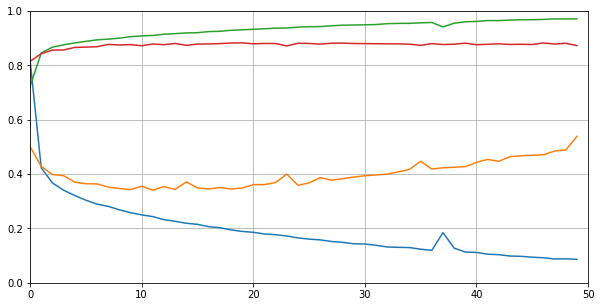

In [33]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,50,0,1])

Nº total de erros: 1273


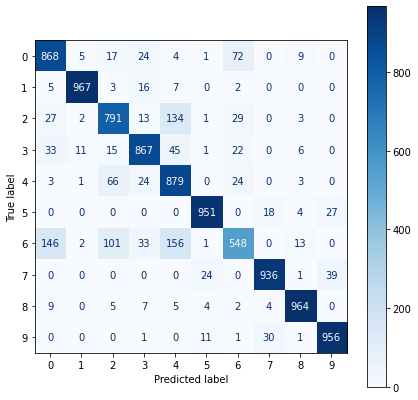

In [34]:
Y2e=nn.predict(X2N)
y2e=np.argmax(Y2e,axis=1)

CM=confusion_matrix(y2,y2e)
print('Nº total de erros:',np.sum(y2!=y2e))
disp=ConfusionMatrixDisplay(CM)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)

### 3rd Try:
### Using normalized data
### 5-layer MLP with DropOut layers


In [35]:
nn=keras.Sequential()
#1º convert images to vectors (1st layer)
nn.add(keras.layers.Flatten(input_shape=[28,28]))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(10,activation='softmax'))

nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

In [37]:
#increase the number of epochs
train=nn.fit(X1N,Y1,epochs=100,batch_size=1000,validation_data=(X2N,Y2))

Epoch 1/100
60/60 [==============================] - 2s 15ms/step - loss: 1.3946 - accuracy: 0.5113 - val_loss: 0.6546 - val_accuracy: 0.7701
Epoch 2/100
60/60 [==============================] - 1s 12ms/step - loss: 0.7888 - accuracy: 0.7205 - val_loss: 0.5235 - val_accuracy: 0.8174
Epoch 3/100
60/60 [==============================] - 1s 11ms/step - loss: 0.6608 - accuracy: 0.7701 - val_loss: 0.4818 - val_accuracy: 0.8264
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 0.6079 - accuracy: 0.7864 - val_loss: 0.4586 - val_accuracy: 0.8351
Epoch 5/100
60/60 [==============================] - 1s 12ms/step - loss: 0.5678 - accuracy: 0.8010 - val_loss: 0.4429 - val_accuracy: 0.8426
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 0.5456 - accuracy: 0.8069 - val_loss: 0.4336 - val_accuracy: 0.8447
Epoch 7/100
60/60 [==============================] - 1s 12ms/step - loss: 0.5276 - accuracy: 0.8135 - val_loss: 0.4239 - val_accuracy: 0.8456
Epoch 

60/60 [==============================] - 1s 11ms/step - loss: 0.3676 - accuracy: 0.8669 - val_loss: 0.3349 - val_accuracy: 0.8802
Epoch 59/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3619 - accuracy: 0.8689 - val_loss: 0.3313 - val_accuracy: 0.8803
Epoch 60/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3686 - accuracy: 0.8663 - val_loss: 0.3332 - val_accuracy: 0.8792
Epoch 61/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3608 - accuracy: 0.8688 - val_loss: 0.3323 - val_accuracy: 0.8813
Epoch 62/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3661 - accuracy: 0.8667 - val_loss: 0.3330 - val_accuracy: 0.8774
Epoch 63/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3679 - accuracy: 0.8690 - val_loss: 0.3326 - val_accuracy: 0.8785
Epoch 64/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3650 - accuracy: 0.8686 - val_loss: 0.3320 - val_accuracy: 0.8788
Epoch 65/100

(0.0, 50.0, 0.0, 1.0)

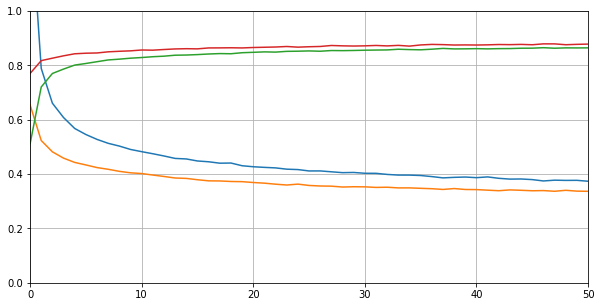

In [38]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,50,0,1])

Nº total de erros: 1170


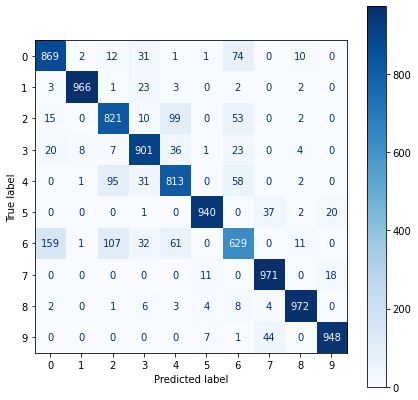

In [39]:
Y2e=nn.predict(X2N)
y2e=np.argmax(Y2e,axis=1)

CM=confusion_matrix(y2,y2e)
print('Nº total de erros:',np.sum(y2!=y2e))
disp=ConfusionMatrixDisplay(CM,)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)